<h2>Uniform samples from a circular region</h2>
<p>
    Probability density functions are given in the question. By definition, $\Theta$ is uniformly distributed. So, we only need to sample from p(r) using inversion method. First, we'll integrate the probability density function of p(r) to find cumulative distribution function. $$ F(x) = \int_{0}^{r}2t \partial t = t^2\Big|_r^0=r^2 $$ Then, we'll sample from the inverted CDF. $$ F(r) = r^2 = y \Leftrightarrow r = \sqrt{y} \Leftrightarrow F'(r) = \sqrt{r} $$
    By sampling from $\sqrt{r}$, we have the distances from the origin. We'll acquire the points by just using right-triangle property with respect to $\Theta$ and r. $$ x = r sin(\Theta) \\ y = r cos(\Theta) $$
</p>



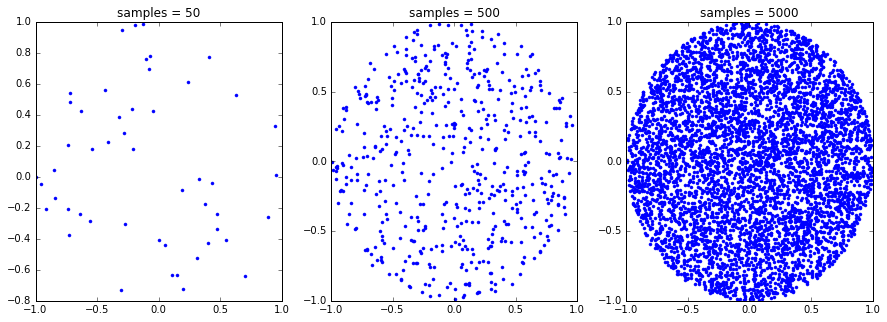

In [141]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xPoints = []
yPoints = []

def sample_r():
    return(np.sqrt(np.random.rand()))
def sample_theta():
    return(np.random.uniform(0, 2 * np.pi))
def generatePoints():
    # suppose sample_r is the distance from the origin. Thus we'll find a point(x,y) from given
    #"sample_r" with an angle "sample_teta"
    tiltAngle = sample_theta()
    r = sample_r()
    x = r * np.sin(tiltAngle)
    y = r * np.cos(tiltAngle)
    xPoints.append(x)
    yPoints.append(y)

def inversionSampling(samples):
    for i in range(samples):
        generatePoints()

#now we'll plot generated random points

f, subplts = plt.subplots(1,3,figsize=(15,5))
samples = 50
for i in range(3):
    inversionSampling(samples)
    subplts[i].set_title("samples = " + str(samples))
    subplts[i].plot(xPoints, yPoints,'.b')
    samples = samples * 10
plt.show()


<h2>Rejection Sampling</h2>
<p>
    Intuitively, we'll use the samples from the unit ball which we generated in question 1. Since $ p(x) \leqslant Mq(x) $ for all $0\leqslant x\leqslant 1$, the proposal function associated with the unit ball seems appropriate for sampling. Then, we'll just accept or reject randomly selected points based on the probability density function.    
</p>

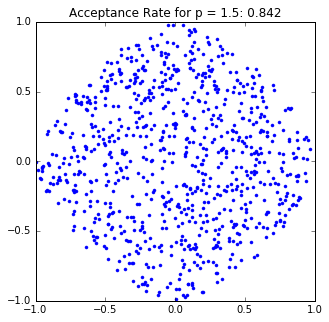

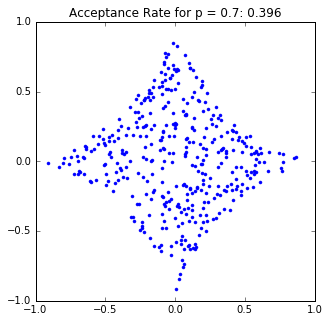

In [155]:
def pr(x,y,p):
    return np.power(np.absolute(np.power(np.absolute(x), p) + np.power(np.absolute(y), p)), (1/p))

def acceptOrReject(x,y,p):
    return pr(x,y,p) <= 1

samples = 1000
def plotting(p):
    inversionSampling(samples)
    acceptedX = []
    acceptedY = []
    for i in range(samples):
        if acceptOrReject(xPoints[i], yPoints[i], p) :
            acceptedX.append(xPoints[i])
            acceptedY.append(yPoints[i])
    
    
    plt.figure(figsize=(5, 5))
    plt.title("Acceptance Rate for p = " + str(p) + ": " + str(len(acceptedX) / float(samples)))
    plt.plot(acceptedX,acceptedY, '.b')
    plt.show()
  
plotting(1.5)
plotting(0.7)


<h2>Proposal with better efficiency</h2>
<p>
    For p = 0.7, better proposal can be $ |x| + |y| \leqslant 1 $ by assigning p to 1 on the probability distribution function since $ p(x) \leqslant Mq(x) $ for all $0\leqslant x\leqslant 1$.  However, sampling from this proposal seems difficult because inversion process is challenging. We observe that this inequality is a parallelogram on 2-D coordinate system which is bounded between [-1, 1]. Instead of calculating the inverse of the proposal function, we can sample from the unit square $[-\sqrt(2)/2, \sqrt(2)/2]$ which is rotated by $ \pi / 4 $ as mentioned in class. 
</p>

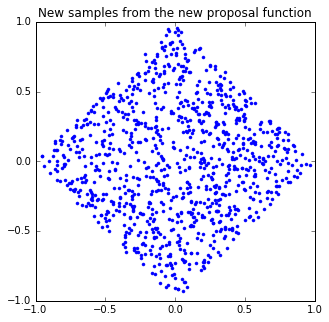

In [154]:
samples = 1000
newXPoints = []
newYPoints = []
#We'll use inversion sampling to sample from the new proposal function
def samplingFromNewProposal(samples):
    for i in range(samples):
        x = np.random.uniform(-np.sqrt(2)/2 , np.sqrt(2)/2)
        y = np.random.uniform(-np.sqrt(2)/2 , np.sqrt(2)/2)
        #rotating points
        x1 = np.cos(np.pi/4)*x + np.sin(np.pi/4)*y
        y1 = np.cos(np.pi/4)*y - np.sin(np.pi/4)*x
        newXPoints.append(x1)
        newYPoints.append(y1)

#draw new samples
def plotNewSamples():
    samplingFromNewProposal(samples)
    plt.figure(figsize=(5, 5))
    plt.title("New samples from the new proposal function" )
    plt.plot(newXPoints,newYPoints,'.b')
    plt.show()

plotNewSamples()
        

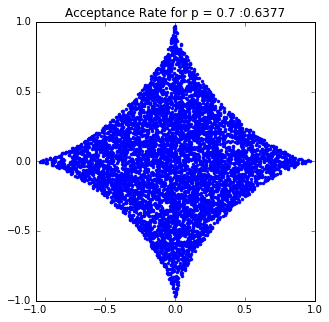

In [152]:
def plotWithBetterEfficiency():
    samplingFromNewProposal(samples)
    acceptedX = []
    acceptedY = []
    for i in range(samples):
        if acceptOrReject(newXPoints[i], newYPoints[i], 0.7) :
            acceptedX.append(newXPoints[i])
            acceptedY.append(newYPoints[i])
    plt.figure(figsize=(5, 5))
    plt.title("Acceptance Rate for p = 0.7 :" + str(len(acceptedX) / float(samples)))
    plt.plot(acceptedX,acceptedY, '.b')
    plt.show()
    
plotWithBetterEfficiency()

<h2>Bonus question 1</h2>
<p>
    In sampleFromNVariateNormalDist() function, we'll generate a sample from n-variate gaussian distribution by generating a random vector and normalizing it. Then, we propose $r^n$ which we intituively claim that generated values will be uniformly distributed. Multiplying the vector by generated r value associated with the dimensionality, we obtain randomly generated vectors.
</p>

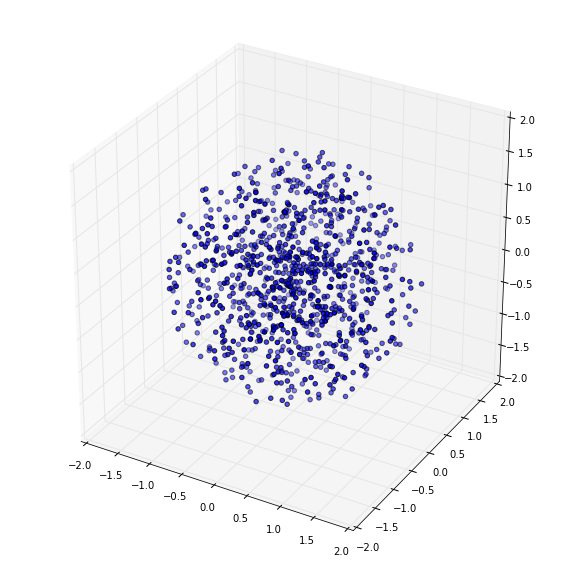

In [190]:
from mpl_toolkits.mplot3d import Axes3D

newSamples = []

def normalize(v):
    norm=np.linalg.norm(v)
    if norm==0: 
       return v
    return v/norm

def sampleFromNVariateNormalDist(numOfSample, dimension):
    mean = np.zeros(dimension)
    cov =  np.matrix(np.identity(dimension))
    vectorList = np.random.multivariate_normal(mean, cov, numOfSample)
    for i in range(numOfSample):
        vector = vectorList[i]
        vector = normalize(vector) 
        vector = vector * np.sqrt(np.random.rand() * dimension)
        newSamples.append(vector)
        

x = []
y = []
z = []
sampleFromNVariateNormalDist(1000, 3)
for i in range(1000):
    vector = newSamples[i]
    x.append(vector[0])
    y.append(vector[1])
    z.append(vector[2])
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b')
plt.show()





<h2>Bonus question 2</h2>
<p>
    when n is equal to 3, our probability density function would be $x^2 + y^2 + z^2 = 1$ which is the unit sphere. Considering the unit sphere density function, we'll see that norm of the selected vector should be less than or equal to 1 so that it can be included in the unit sphere. By generalizing this implication, we propose that any sample vector which has a norm value less than or equal to 1 is accepted, otherwise rejected according to the rejection sampling method.  
</p>
<p>
    Acceptance rates are also calculated and plotted for different dimensions.   
</p>

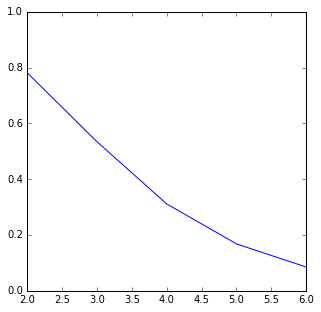

In [209]:

def inversionSamplingInNDimensionalSpace(dimension, sampleSize):
    numberOfAcceptedPoints = 0
    for i in range(sampleSize):
        v = np.random.sample(dimension)
        if(np.linalg.norm(v) <= 1):
            numberOfAcceptedPoints = numberOfAcceptedPoints + 1
    return numberOfAcceptedPoints

def calculateAndPlotAcceptanceRates(dimensionLimit, sampleSize):
    acceptanceRateList = []
    for i in range(2,dimensionLimit):
        numberOfAcceptedPoints = inversionSamplingInNDimensionalSpace(i,sampleSize)
        acceptanceRate = numberOfAcceptedPoints/float(sampleSize)
        acceptanceRateList.append(acceptanceRate)
        #print('' + str(acceptanceRate))
    #plotting acceptance rates
    plt.figure(figsize=(5, 5))
    plt.plot([i for i in range(2,dimensionLimit)],acceptanceRateList)
    plt.xlim(2, dimensionLimit-1)
    plt.ylim(0, 1)
    plt.show()

calculateAndPlotAcceptanceRates(7,10000)